In [1]:
# OG code by Krutarth Bhatt
# modified by Maddie 10/4/22

In [2]:
#Libraries
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
import math
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sqrt
from matplotlib.patches import ConnectionPatch
import os
from scipy.spatial.distance import euclidean
import shapely
from shapely.geometry import LineString
from shapely import affinity

import RM_functions as rm # script with rock matching functions

## Working directory
print(os.getcwd())
#os.chdir("src/Rock_Matching_Files/") #do not need for VScode Interactive 

/workspaces/rgr/src/Rock_Matching_Files


## Open 'Rock' Shapefiles --- Time Frames 1 & 2

In [3]:
# TIME FRAME 1
print('opening shapefile..')
df = gpd.read_file("test_rocks_11_12_22/test_rocks.shp")

#TIME FRAME 2 
df3 = gpd.read_file("test_rocks_11_12_22/test_rocks.shp")


opening shapefile..


## Set TimeFrame 2 Params

How do you want the rocks to of changed from TF1 to TF2?

In [4]:
rot = 0
trans_x = 0
trans_y = 1
remove = 0


#Apply changes to Timeframe 2
df3['geometry'] = df3.rotate(rot) # rotate rocks 
df3['geometry'] = df3.translate(trans_x, trans_y) # translate rocks


if remove>0:
    df3 = df3[:remove] # remove rocks

print(len(df))
print(len(df3))


21
21


## Choose Parameters for Simiarity analysis
Options:

all_geom        --- uses all geometric parameters 

jus_centroid    ---- only considers the centroid (spatial position of each rock)

jus_area        ----- only considers the area of each rock

jus_ecc         ----- only considers eccentricity of rocks

jus_perimeter 

jus_compactness

jus_convexity

jus_angle

all

In [5]:
use_params = 'all'

## Geometric Calculations

running geometric calculations for df...
running geometric calculations for df3....


Text(0.5, 1.0, 'Time Frame 2: Semantically Mapped Rocks')

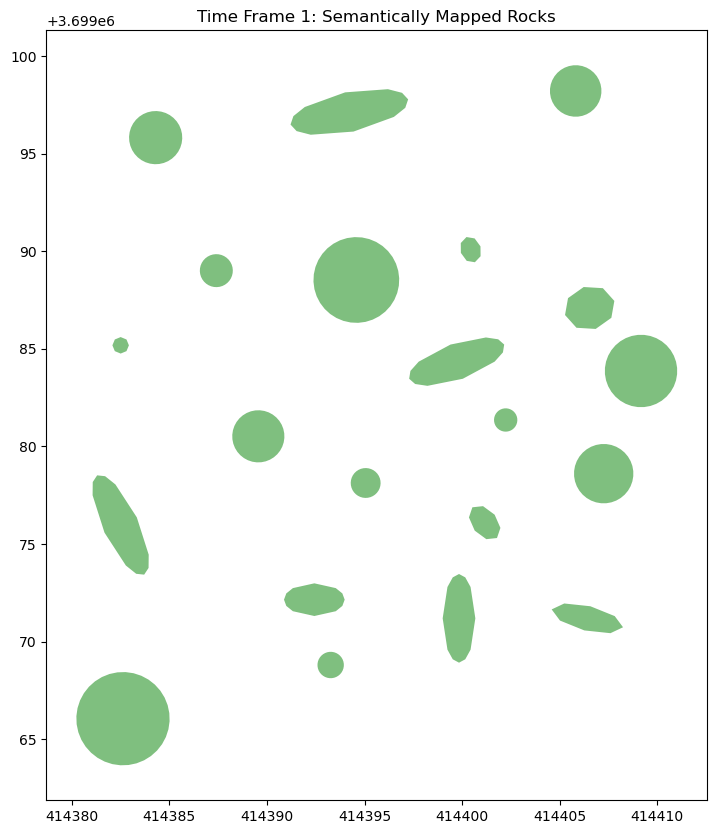

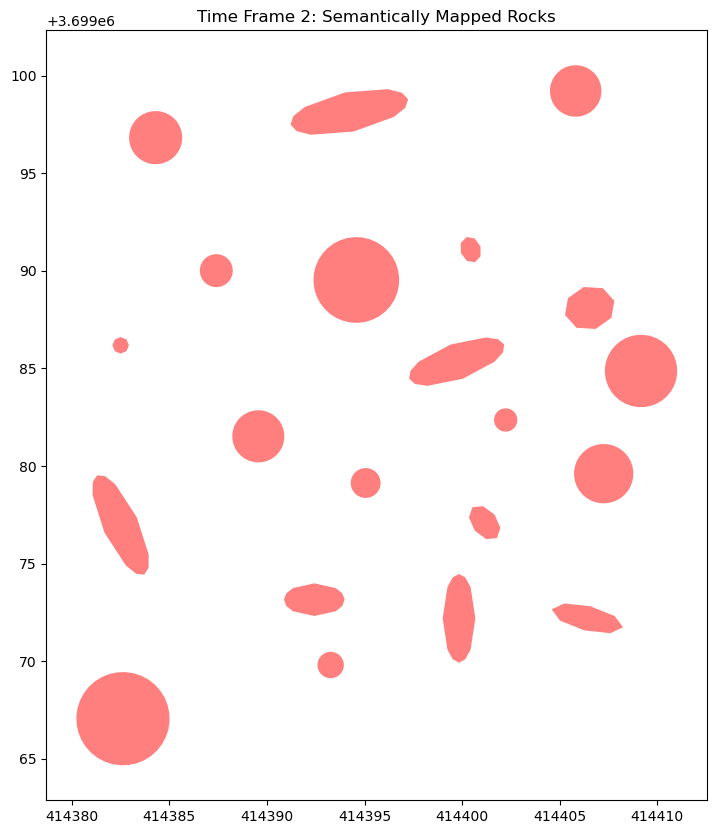

In [6]:
# RUN GEOMETRIC CALCULATIONS
print('running geometric calculations for df...')
df.head()

# Area
df["area"] = df.area
df['centroid'] = df.centroid
df['centroid']
df = df.set_geometry("geometry")

# spatial position (centroid values of each rock)
df['cent_x']=None # empty columns for centroid x,y vals
df['cent_y']=None

for i in range(len(df)): # fill columns w/ x,y vals from centroid Point 
    df['cent_x'][i] = df['centroid'][i].x
    df['cent_y'][i] = df['centroid'][i].y

#plot rocks by area
#plt.figure(figsize=(16, 8))
# TO DO: add axes to plots (1/18/23)
#df["area"].plot(kind='hist')
#df.plot("area", legend=True, figsize=(16, 16))

df['ecc'] = None
df['r_ecc'] = None
for j in range(len(df)):
    try:
        area_polygon = [[i[1],i[0]] for i in list(df['geometry'][j].exterior.coords)]
    except:
        area_polygon = [[i[1],i[0]]  for poly in list(df['geometry'][j]) for i in list(poly.exterior.coords)]
    df['ecc'][j] = rm.get_ecc(area_polygon)
    df['r_ecc'][j] = df['ecc'][j] + 1 # Re-scale ecc by adding 1 to avoid division by zero

df["perimeter"] = df["geometry"].length
df["compactness"] = df.geometry.apply(rm.pp_compactness)
df["convexity"] = df.geometry.apply(rm.convexity)
df["solidity"] = df.geometry.apply(rm.solidity)
df["angle"] = df.geometry.apply(rm.getAngle)


#### DF3 -- TIME FRAME 2 #--------------------------------------------------------
print('running geometric calculations for df3....')
# create & populate area and centroid attributes
df3["area"] = df3.area
df3['centroid'] = df3.centroid
df3['centroid']
df3 = df3.set_geometry("geometry")

df3['cent_x']=None # empty columns for centroid x,y vals
df3['cent_y']=None

for i in range(len(df3)): # fill columns w/ x,y vals from centroid Point 
    df3['cent_x'][i] = df3['centroid'][i].x
    df3['cent_y'][i] = df3['centroid'][i].y

df3['ecc'] = None
df3['r_ecc'] = None
for j in range(len(df3)):
    try:
        area_polygon = [[i[1],i[0]] for i in list(df3['geometry'][j].exterior.coords)]
    except:
        area_polygon = [[i[1],i[0]]  for poly in list(df3['geometry'][j]) for i in list(poly.exterior.coords)]
    df3['ecc'][j] = rm.get_ecc(area_polygon)
    df3['r_ecc'][j] =  df3['ecc'][j] + 1 # Re-scale ecc by adding 1 to avoid division by zero
    
df3["perimeter"] = df3["geometry"].length
df3["compactness"] = df3.geometry.apply(rm.pp_compactness)
df3["convexity"] = df3.geometry.apply(rm.convexity)
df3["solidity"] = df3.geometry.apply(rm.solidity)
df3["angle"] = df3.geometry.apply(rm.getAngle)


df.plot(color = 'g', figsize=(10,10), alpha = 0.5)
plt.title("Time Frame 1: Semantically Mapped Rocks")

df3.plot(color = 'r', figsize=(10,10), alpha = 0.5)
plt.title("Time Frame 2: Semantically Mapped Rocks")

In [7]:
df

,Id,geometry,area,centroid,cent_x,cent_y,ecc,r_ecc,perimeter,compactness,convexity,solidity,angle
0,0,"POLYGON ((414390.159 3699079.325, 414389.942 3...",5.582305,POINT (414389.561 3699080.521),414389.561094,3699080.520667,0.000016,1.000016,8.386175,0.997460,1.0,1.0,-178.435182
1,0,"POLYGON ((414395.538 3699077.532, 414395.427 3...",1.830996,POINT (414395.060 3699078.130),414395.059518,3699078.130048,0.000018,1.000018,4.802870,0.997460,1.0,1.0,103.650131
2,0,"POLYGON ((414395.418 3699086.497, 414395.053 3...",15.094552,POINT (414394.581 3699088.529),414394.581394,3699088.529241,0.00001,1.00001,13.790095,0.997460,1.0,1.0,-172.620306
3,0,"POLYGON ((414399.406 3699085.222, 414401.219 3...",7.093683,POINT (414399.721 3699084.346),414399.721225,3699084.345658,0.659697,1.659697,11.573465,0.665510,1.0,1.0,-168.683474
4,0,"POLYGON ((414401.666 3699076.506, 414401.962 3...",1.862875,POINT (414401.156 3699076.098),414401.155596,3699076.098022,0.000031,1.000031,5.145303,0.884243,1.0,1.0,143.692922
5,0,"POLYGON ((414392.430 3699072.990, 414393.529 3...",3.828950,POINT (414392.430 3699072.154),414392.429837,3699072.1535,0.84265,1.84265,7.598908,0.833273,1.0,1.0,167.427057
6,0,"POLYGON ((414402.590 3699080.879, 414402.501 3...",1.116461,POINT (414402.231 3699081.357),414402.231375,3699081.357384,0.000025,1.000025,3.750411,0.997460,1.0,1.0,-18.133271
7,0,"POLYGON ((414388.246 3699088.888, 414388.213 3...",2.232922,POINT (414387.410 3699089.007),414387.409536,3699089.007365,0.000012,1.000012,5.303883,0.997460,1.0,1.0,106.870841
8,0,"POLYGON ((414399.936 3699089.916, 414399.931 3...",1.018372,POINT (414400.438 3699090.083),414400.438411,3699090.083144,0.444444,1.444444,3.717603,0.925955,1.0,1.0,-89.422241
9,0,"POLYGON ((414383.336 3699076.370, 414383.946 3...",7.586599,POINT (414382.509 3699075.978),414382.508767,3699075.978491,0.668659,1.668659,12.388506,0.621182,1.0,1.0,107.674729


## Vectorization

In [8]:
## VECTORIZATION -- Both DFs
# VECT DF 1
print('running vectorization...')
# creates a vector attribute representing the combined geometric params
df['feature_vec'] = None
for i in range(len(df)):
    
    # All Geometric Params --- Krutharth's OG settings
    if use_params == 'all_geom':
        df['feature_vec'][i] = [df["area"][i], df['ecc'][i], df['perimeter'][i], df['compactness'][i], df['convexity'][i], df['solidity'][i], df['angle'][i]]
    
    #Just centroid
    if use_params == 'jus_centroid':
        df['feature_vec'][i] = [df["cent_x"][i], df["cent_y"][i]]

    # Just area
    if use_params =='jus_area':
        df['feature_vec'][i] = [df["area"][i]]

    # Just ecc
    if use_params == 'jus_ecc':
        df['feature_vec'][i] = [df["r_ecc"][i]]

    # Just perimeter
    if use_params =='jus_perimeter':
        df['feature_vec'][i] = [df["perimeter"][i]]
    
    # Just compactness
    if use_params =='jus_compactness':
        df['feature_vec'][i] = [df["compactness"][i]]

    # Just convexity
    if use_params =='jus_convexity':
        df['feature_vec'][i] = [df["convexity"][i]]

    # Just solidity
    if use_params =='jus_solidity':
        df['feature_vec'][i] = [df["solidity"][i]]

    # Just angle
    if use_params =='jus_angle':
        df['feature_vec'][i] = [df["angle"][i]]

    if use_params =='all':
        df['feature_vec'][i] = [df["cent_x"][i], df["cent_y"][i], df["area"][i], df['ecc'][i], df['perimeter'][i], df['compactness'][i], df['convexity'][i], df['solidity'][i], df['angle'][i]]

# VECT DF 2
df3['feature_vec'] = None
for i in range(len(df3)):
    # All Geometric Params --- Krutharth's OG settings
    if use_params =='all_geom':
        df3['feature_vec'][i] = [df3["area"][i], df3['ecc'][i], df3['perimeter'][i], df3['compactness'][i], df3['convexity'][i], df3['solidity'][i], df3['angle'][i]]
    
    # Just centroid:
    if use_params =='jus_centroid':
        df3['feature_vec'][i] = [df3["cent_x"][i], df3["cent_y"][i]]

    # Just area
    if use_params =='jus_area':
        df3['feature_vec'][i] = [df3["area"][i]]

    # Just ecc
    if use_params =='jus_ecc':
        df3['feature_vec'][i] = [df3["r_ecc"][i]]

    # Just perimeter
    if use_params =='jus_perimeter':
        df3['feature_vec'][i] = [df3["perimeter"][i]]

    # Just compactness
    if use_params =='jus_compactness':
        df3['feature_vec'][i] = [df3["compactness"][i]]

    # Just convexity
    if use_params =='jus_convexity':
        df3['feature_vec'][i] = [df3["convexity"][i]]

    # Just solidity
    if use_params =='jus_solidity':
        df3['feature_vec'][i] = [df3["solidity"][i]]

    # Just angle
    if use_params =='jus_angle':
        df3['feature_vec'][i] = [df3["angle"][i]]
    
    if use_params =='all':
    # All params (Centroid + All geometric)
        df3['feature_vec'][i] = [df3["cent_x"][i], df3["cent_y"][i], df3["area"][i], df3['ecc'][i], df3['perimeter'][i], df3['compactness'][i], df3['convexity'][i], df3['solidity'][i], df3['angle'][i]]


running vectorization...


## Run TS_SS

In [9]:
# RUN TS_SS with df & df3
df['nearest_matching_polygon_ts_ss'] = None
df['min_ts_ss'] = 1000000000000.0 #1000000000.0 # This number needs to be bigger than any possible TS_SS calc in loop
for i in range(len(df)):
    for j in range(len(df3)):
        #print(i, j) # nested loop compares similarity of ea i w/ ea j
        # calc TS_SS of current i & j:
        curr_ts_ss = rm.TS_SS(df['feature_vec'][i], df3['feature_vec'][j])
        
        #print('curr_ts_ss',  curr_ts_ss, df['feature_vec'][i], df3['feature_vec'][j])
        
        if df['min_ts_ss'][i] > curr_ts_ss:
            df['min_ts_ss'][i] = curr_ts_ss
            df['nearest_matching_polygon_ts_ss'][i] = j

rm.check_matches('_ts_ss', df, df3)

checking matches:
0 3
1 10
2 3
3 3
4 4
5 12
6 5
7 9
8 8
9 9
10 1
11 1
12 12
13 13
14 0
15 13
16 16
17 1
18 18
19 4
20 10
Similarity measure used:  _ts_ss
Number of rocks in TimeFrame 1:  21
Number of rocks in TimeFrame 2:  21
Correct matches: 8
Incorrect matches: 13


In [10]:
df

,Id,geometry,area,centroid,cent_x,cent_y,ecc,r_ecc,perimeter,compactness,convexity,solidity,angle,feature_vec,nearest_matching_polygon_ts_ss,min_ts_ss
0,0,"POLYGON ((414390.159 3699079.325, 414389.942 3...",5.582305,POINT (414389.561 3699080.521),414389.561094,3699080.520667,0.000016,1.000016,8.386175,0.997460,1.0,1.0,-178.435182,"[414389.56109368044, 3699080.520667246, 5.5823...",3,1.450269e+10
1,0,"POLYGON ((414395.538 3699077.532, 414395.427 3...",1.830996,POINT (414395.060 3699078.130),414395.059518,3699078.130048,0.000018,1.000018,4.802870,0.997460,1.0,1.0,103.650131,"[414395.0595176755, 3699078.130048117, 1.83099...",10,8.895769e+09
2,0,"POLYGON ((414395.418 3699086.497, 414395.053 3...",15.094552,POINT (414394.581 3699088.529),414394.581394,3699088.529241,0.00001,1.00001,13.790095,0.997460,1.0,1.0,-172.620306,"[414394.5813938499, 3699088.529241327, 15.0945...",3,5.958374e+09
3,0,"POLYGON ((414399.406 3699085.222, 414401.219 3...",7.093683,POINT (414399.721 3699084.346),414399.721225,3699084.345658,0.659697,1.659697,11.573465,0.665510,1.0,1.0,-168.683474,"[414399.72122497554, 3699084.3456578525, 7.093...",3,1.277644e+08
4,0,"POLYGON ((414401.666 3699076.506, 414401.962 3...",1.862875,POINT (414401.156 3699076.098),414401.155596,3699076.098022,0.000031,1.000031,5.145303,0.884243,1.0,1.0,143.692922,"[414401.1555964525, 3699076.09802186, 1.862875...",4,1.277638e+08
5,0,"POLYGON ((414392.430 3699072.990, 414393.529 3...",3.828950,POINT (414392.430 3699072.154),414392.429837,3699072.1535,0.84265,1.84265,7.598908,0.833273,1.0,1.0,167.427057,"[414392.4298366345, 3699072.153500298, 3.82895...",12,9.344748e+09
6,0,"POLYGON ((414402.590 3699080.879, 414402.501 3...",1.116461,POINT (414402.231 3699081.357),414402.231375,3699081.357384,0.000025,1.000025,3.750411,0.997460,1.0,1.0,-18.133271,"[414402.23137506016, 3699081.3573839404, 1.116...",5,1.848404e+10
7,0,"POLYGON ((414388.246 3699088.888, 414388.213 3...",2.232922,POINT (414387.410 3699089.007),414387.409536,3699089.007365,0.000012,1.000012,5.303883,0.997460,1.0,1.0,106.870841,"[414387.4095364653, 3699089.0073651536, 2.2329...",9,2.569179e+10
8,0,"POLYGON ((414399.936 3699089.916, 414399.931 3...",1.018372,POINT (414400.438 3699090.083),414400.438411,3699090.083144,0.444444,1.444444,3.717603,0.925955,1.0,1.0,-89.422241,"[414400.43841071404, 3699090.0831437586, 1.018...",8,1.277653e+08
9,0,"POLYGON ((414383.336 3699076.370, 414383.946 3...",7.586599,POINT (414382.509 3699075.978),414382.508767,3699075.978491,0.668659,1.668659,12.388506,0.621182,1.0,1.0,107.674729,"[414382.5087672522, 3699075.978490902, 7.58659...",9,1.277641e+08


## Visualize Matches (TS_SS)

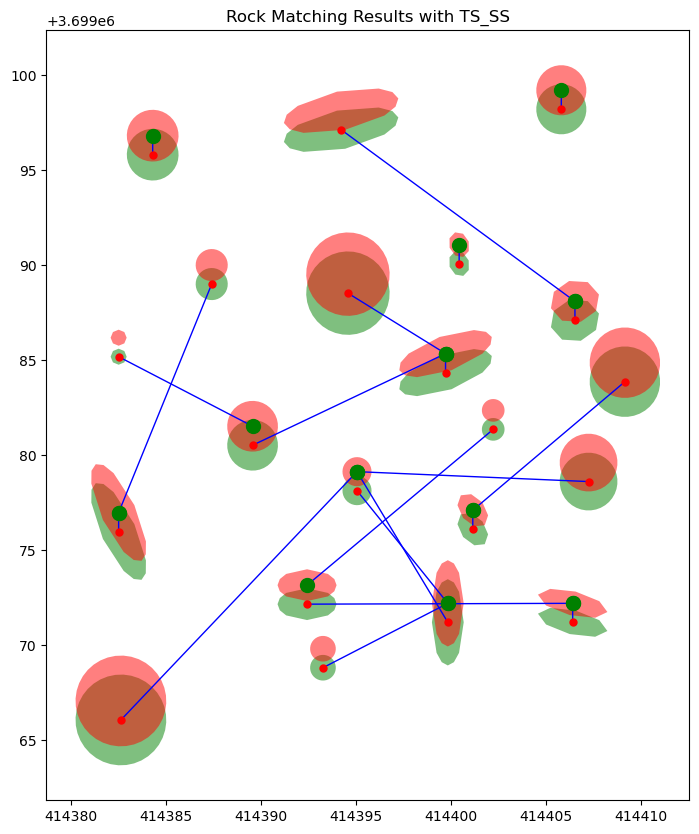

In [11]:
df = rm.get_rock_and_line('_ts_ss', df, df3)
df_sorted = df.sort_values('min_ts_ss')
df_sorted.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(figsize = (10,10))
fig.patch.set_facecolor('white')

# plot both data frames (on same plot)
df.plot(color = 'g', ax=ax, figsize=(10,10), alpha = 0.5)
df3.plot(color = 'r', ax=ax , figsize=(10,10), alpha = 0.5) # alpha adjusted to see overlap of df's
plt.title('Rock Matching Results with TS_SS')
for i in range(0, len(df)):
        #i = 10
        xy = [y for y in df_sorted['line'][i].coords]
        #xy = (x[i],y[i])
        con = ConnectionPatch(xyA=xy[1], xyB=xy[0], coordsA="data", coordsB="data",
                              axesA=ax, axesB=ax, color="blue")
        ax.add_artist(con)

        ax.plot(xy[1][0],xy[1][1],'ro',markersize=10,color='g')
        ax.plot(xy[0][0],xy[0][1],'ro',markersize=5, color='r')
fig.show()

